In [1]:
# a)import required libraries

import numpy as np
import pandas as pd
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential, Model
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

2023-10-17 16:08:50.726701: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 16:08:52.909315: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-10-17 16:08:52.909406: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-10-17 16:08:52.914762: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-10-17 16:08:54.304842: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-10-17 16:08:54.308420: I tensorflow/core/platform/cpu_feature_guard.cc:182] This Tens

In [2]:
# b)upload/access the dataset

df=pd.read_csv('./ecg_autoencoder_dataset.csv')

In [3]:
df

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651,0
4993,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612,0
4994,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334,0
4995,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932,0


In [4]:
df.head()

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742,1
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134,1


In [5]:
df.info()
print("Shape of dataset: ",df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Columns: 141 entries, -0.11252183 to 1
dtypes: float64(140), int64(1)
memory usage: 5.4 MB
Shape of dataset:  (4997, 141)


In [6]:
x=df.drop('1',axis=1)

In [7]:
x

,-0.11252183,-2.8272038,-3.7738969,-4.3497511,-4.376041,-3.4749863,-2.1814082,-1.8182865,-1.2505219,-0.47749208,...,0.16034772,0.79216787,0.93354122,0.79695779,0.57862066,0.2577399,0.22807718,0.12343082,0.92528624,0.19313742
0,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.560327,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250
1,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,1.284825,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797
2,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.491173,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564
3,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,0.966606,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456
4,-1.507674,-3.574550,-4.478011,-4.408275,-3.321242,-2.105171,-1.481048,-1.301362,-0.498240,-0.286928,...,1.214931,1.089068,0.983369,1.014124,0.952629,0.749326,1.007076,1.634990,1.493365,-0.783134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4992,0.608558,-0.335651,-0.990948,-1.784153,-2.626145,-2.957065,-2.931897,-2.664816,-2.090137,-1.461841,...,1.513738,1.757705,2.291923,2.704595,2.451519,2.017396,1.704358,1.688542,1.629593,1.342651
4993,-2.060402,-2.860116,-3.405074,-3.748719,-3.513561,-3.006545,-2.234850,-1.593270,-1.075279,-0.976047,...,1.123739,1.388947,2.079675,2.433375,2.159484,1.819747,1.534767,1.696818,1.483832,1.047612
4994,-1.122969,-2.252925,-2.867628,-3.358605,-3.167849,-2.638360,-1.664162,-0.935655,-0.866953,-0.645363,...,0.205543,-0.472419,-1.310147,-2.029521,-3.221294,-4.176790,-4.009720,-2.874136,-2.008369,-1.808334
4995,-0.547705,-1.889545,-2.839779,-3.457912,-3.929149,-3.966026,-3.492560,-2.695270,-1.849691,-1.374321,...,1.218185,1.258419,1.907530,2.280888,1.895242,1.437702,1.193433,1.261335,1.150449,0.804932


In [8]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4997 entries, 0 to 4996
Columns: 140 entries, -0.11252183 to 0.19313742
dtypes: float64(140)
memory usage: 5.3 MB


In [9]:
x.shape

(4997, 140)

In [10]:
y=df['1']

In [11]:
y

0       1
1       1
2       1
3       1
4       1
       ..
4992    0
4993    0
4994    0
4995    0
4996    0
Name: 1, Length: 4997, dtype: int64

In [12]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.2)

In [13]:
# c)Encoder converts it into latent reprsentation

encoder=Sequential([
    Dense(140,activation='relu',input_shape=(140,)),
    Dense(64,activation='relu'),
    Dense(32,activation='relu'),
    Dense(16,activation='relu'),
    Dense(8,activation='relu'),
])

In [14]:
# d)Decoder networks convert it back to the original input
decoder=Sequential([
    Dense(8,activation='relu'),
    Dense(16,activation='relu'),
    Dense(32,activation='relu'),
    Dense(64,activation='relu'),
    Dense(140,activation='relu'),
])(encoder.output)

In [15]:
# e)Compile the models with optimizer, loss and evaluation metrics

model=Model(inputs=encoder.input,outputs=decoder)
model.compile(loss='msle',metrics=['mse','accuracy'],optimizer='adam')

In [16]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_input (InputLayer)    [(None, 140)]             0         
                                                                 
 dense (Dense)               (None, 140)               19740     
                                                                 
 dense_1 (Dense)             (None, 64)                9024      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 8)                 136       
                                                                 
 sequential_1 (Sequential)   (None, 140)               11972 

In [17]:
y_train=y_train.astype(bool)
y_test=y_test.astype(bool)

In [18]:
normal_train=x_train[y_train]
normal_test=x_test[y_test]

In [19]:
# epochs training

epochs=100
H=model.fit(normal_train,normal_train,validation_data=(x_test,x_test),epochs=epochs)

Epoch 1/100
73/73 [==============================] - 5s 13ms/step - loss: 0.0904 - mse: 0.9020 - accuracy: 0.0352 - val_loss: 0.0819 - val_mse: 0.9193 - val_accuracy: 0.0410
Epoch 2/100
73/73 [==============================] - 0s 6ms/step - loss: 0.0529 - mse: 0.7890 - accuracy: 0.1241 - val_loss: 0.0577 - val_mse: 0.8447 - val_accuracy: 0.1170
Epoch 3/100
73/73 [==============================] - 0s 7ms/step - loss: 0.0387 - mse: 0.7452 - accuracy: 0.1740 - val_loss: 0.0548 - val_mse: 0.8375 - val_accuracy: 0.1290
Epoch 4/100
73/73 [==============================] - 0s 6ms/step - loss: 0.0343 - mse: 0.7368 - accuracy: 0.1662 - val_loss: 0.0505 - val_mse: 0.8280 - val_accuracy: 0.1210
Epoch 5/100
73/73 [==============================] - 0s 6ms/step - loss: 0.0295 - mse: 0.7260 - accuracy: 0.1985 - val_loss: 0.0465 - val_mse: 0.8135 - val_accuracy: 0.1160
Epoch 6/100
73/73 [==============================] - 0s 7ms/step - loss: 0.0260 - mse: 0.7149 - accuracy: 0.2221 - val_loss: 0.0433 - 

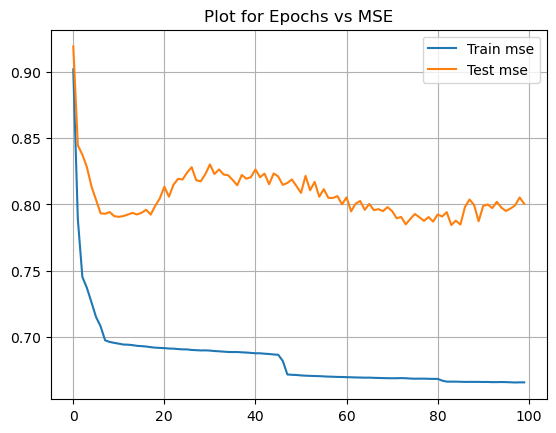

In [20]:
# result visualization

plt.title("Plot for Epochs vs MSE")
plt.plot(range(0,epochs),H.history['mse'],label="Train mse")
plt.plot(range(0,epochs),H.history['val_mse'],label="Test mse")
plt.xlabel="Epochs"
plt.ylabel="MSE"
plt.legend()
plt.grid()

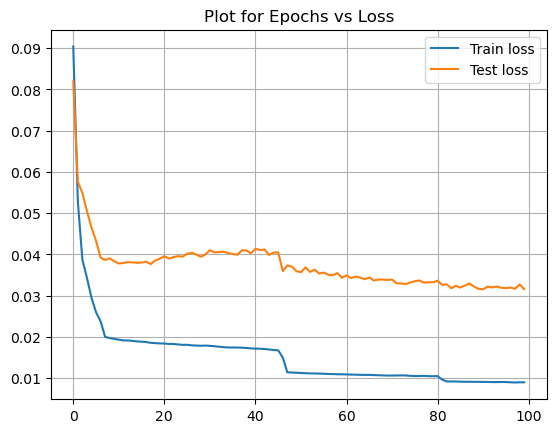

In [21]:
plt.title("Plot for Epochs vs Loss")
plt.plot(range(0,epochs),H.history['loss'],label="Train loss")
plt.plot(range(0,epochs),H.history['val_loss'],label="Test loss")
plt.xlabel="Epochs"
plt.ylabel="Loss"
plt.legend()
plt.grid()

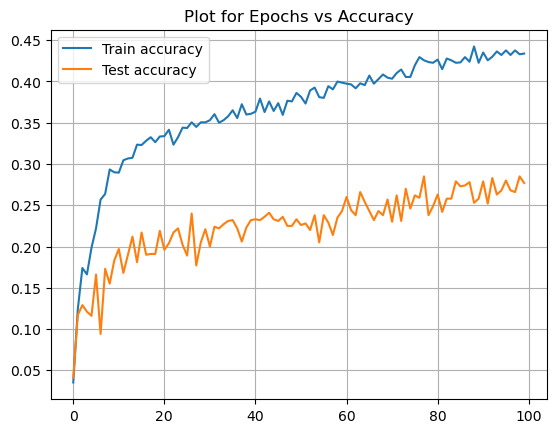

In [22]:
plt.title("Plot for Epochs vs Accuracy")
plt.plot(range(0,epochs),H.history['accuracy'],label="Train accuracy")
plt.plot(range(0,epochs),H.history['val_accuracy'],label="Test accuracy")
plt.xlabel="Epochs"
plt.ylabel="accuracy"
plt.legend()
plt.grid()